In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import math,copy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
data=pd.read_csv("/content/drive/MyDrive/parkinson.zip")

In [38]:
data.shape

(195, 24)

In [39]:
data.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [41]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [42]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [43]:
data['status'].value_counts()  #1 represent parkinson whereas 0 represent healthy

status
1    147
0     48
Name: count, dtype: int64

In [44]:
X=data.drop(columns=['name','status'],axis=1)  #since we are dropping columns so axis is 1
Y=data['status']

In [45]:
scaler=StandardScaler()

In [46]:
scaler.fit(X)

StandardScaler()

In [47]:
X_train=scaler.transform(X)
#X_test=scaler.transform(X_test)

In [48]:
print(X_train)

[[-0.82929965 -0.43616456 -0.95203729 ...  0.48047686 -0.21053082
   0.86888575]
 [-0.77097169 -0.53097409 -0.05772056 ...  1.31118546  0.27507712
   1.80360503]
 [-0.90947638 -0.7231683  -0.10987483 ...  1.01768236 -0.10362861
   1.40266141]
 ...
 [ 0.49557839  0.47010361 -0.96839309 ... -0.81807931  0.78033848
  -0.83241014]
 [ 1.07876114  2.19004398 -0.95417967 ... -0.22906571 -0.63700298
  -0.92610456]
 [ 1.45481664  0.69224632 -0.88348115 ... -0.43085284  0.45480231
  -0.64505466]]


In [33]:
print(Y_train)

123    1
160    1
94     1
57     1
41     1
      ..
43     0
22     1
72     1
15     1
168    0
Name: status, Length: 156, dtype: int64


In [49]:
len(X_train)

195

In [50]:
len(Y)

195

In [51]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [52]:
def compute_cost(X, y, w, b, *argv):


    m, n = X.shape

    cost = 0.
    epsilon = 1e-15  # Small constant to avoid log(0) and division by zero

    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        # Avoiding extreme values to prevent NaN issues
        f_wb_i = np.clip(f_wb_i, epsilon, 1 - epsilon)
        cost += - y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)

    total_cost = cost / m

    return total_cost

In [53]:
m, n = X_train.shape

# Compute and display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train,Y, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


In [54]:
def compute_gradient(X, y, w, b, *argv):

    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        z_wb = np.dot(X[i], w) + b
        f_wb = sigmoid(z_wb)

        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i

        for j in range(n):
            dj_dw[j] += X[i, j] * dj_db_i

    dj_db /= m
    dj_dw /= m

    return dj_db, dj_dw

In [55]:
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, Y, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):-0.25384615384615383
dj_dw at initial w and b (zeros):[0.16521514205020854, 0.07156642649064926, 0.16377864707131698, -0.11984844233569744, -0.1458813345572573, -0.11487217819934627, -0.12436236472827505, -0.11486293289114224, -0.1582774781079872, -0.151069436309066, -0.1497426927118912, -0.15126394163484227, -0.15693601074226363, -0.14973898349328255, -0.08160032198221408, 0.15572948103988024, -0.1329212774842414, -0.09982614826600957, -0.24331482947160057, -0.1959319927852615, -0.14656126579461792, -0.22875532782226726]


In [56]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):


    # number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [57]:
np.random.seed(1)
initial_w = np.random.randn(22) * 0.01
initial_b = 0

# Some gradient descent settings (can be tweaked/ changed)
iterations = 10000
alpha = 0.0001

w,b, J_history,_ = gradient_descent(X_train ,Y, initial_w, initial_b,
                                   compute_cost, compute_gradient, alpha, iterations, 0)
#gradient descent is converging

Iteration    0: Cost     0.69   
Iteration 1000: Cost     0.65   
Iteration 2000: Cost     0.62   
Iteration 3000: Cost     0.60   
Iteration 4000: Cost     0.58   
Iteration 5000: Cost     0.56   
Iteration 6000: Cost     0.55   
Iteration 7000: Cost     0.54   
Iteration 8000: Cost     0.53   
Iteration 9000: Cost     0.52   
Iteration 9999: Cost     0.52   


In [58]:
def predict(X, w, b):

    # number of training examples
    m, n = X.shape
    p = np.zeros(m)

    ### START CODE HERE ###
    # Loop over each example
    for i in range(m):
        z_wb = np.dot(X[i], w) + b  # Linear combination of features and weights
        f_wb = sigmoid(z_wb)  # Sigmoid function to get probabilities

        # Apply the threshold (0.5) to determine the class (0 or 1)
        p[i] = 1 if f_wb > 0.5 else 0

    ### END CODE HERE ###
    return p

In [60]:
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == Y) * 100))

Train Accuracy: 78.461538


In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
model=LogisticRegression()

In [71]:
model.fit(X_train, Y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8717948717948718


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


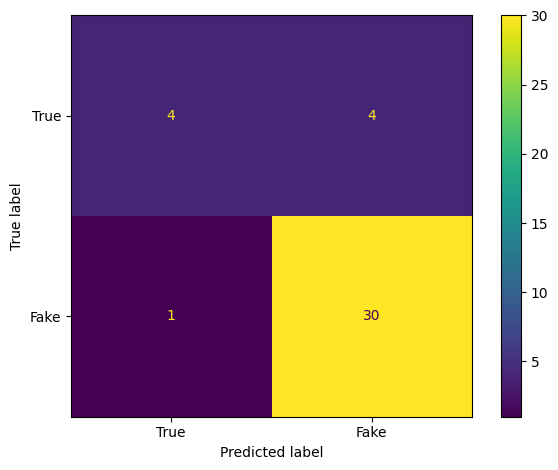

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score,ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix =cm, display_labels =['True', 'Fake'])
cm_display.plot()
plt.tight_layout()
plt.show()

In [81]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']